In [149]:
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
# read data
logins = pd.read_json('logins.json')
logins.head(3)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [151]:
# rounding the login times to the nearest 15 minutes

logins['login_time'] = logins['login_time'].dt.round('15min')
logins.head()

,login_time
0,1970-01-01 20:15:00
1,1970-01-01 20:15:00
2,1970-01-01 20:15:00
3,1970-01-01 20:15:00
4,1970-01-01 20:30:00


In [152]:
# Sorting the data by login_time 

pd.options.display.max_rows = 100
logins.sort_values(by='login_time')

#Grouping by login_time

logins['login_day'] = logins['login_time'].dt.round('D')
logins.head()

,login_time,login_day
0,1970-01-01 20:15:00,1970-01-02
1,1970-01-01 20:15:00,1970-01-02
2,1970-01-01 20:15:00,1970-01-02
3,1970-01-01 20:15:00,1970-01-02
4,1970-01-01 20:30:00,1970-01-02


In [153]:
# grouping by login_day - how many logins for each day

byday = logins.groupby('login_day').count()
byday.columns = ['num_logins']
byday.head()

,num_logins
login_day,
1970-01-02,396
1970-01-03,802
1970-01-04,900
1970-01-05,489
1970-01-06,436


Text(0, 0.5, 'Number of Logins')

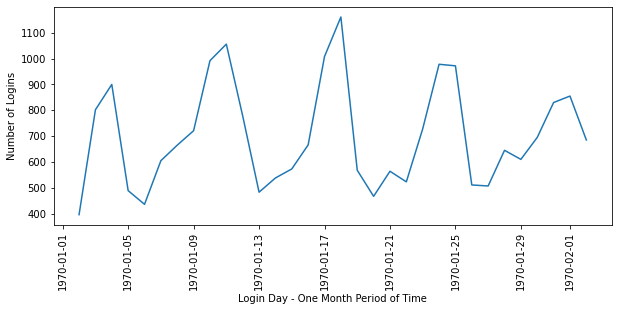

In [158]:
# plotting number of logins per day for one month period of time

plt.figure(figsize=(10,4))
plt.plot(byday['num_logins']['1970-01-02':'1970-02-02'])
plt.xticks(rotation=90)
plt.xlabel('Login Day - One Month Period of Time')
plt.ylabel('Number of Logins')

# There certainly is a cyclical pattern interms of number of logins per day. 
# Let's zoom in to determine the frequency.

Text(0, 0.5, 'Number of Logins Per Day')

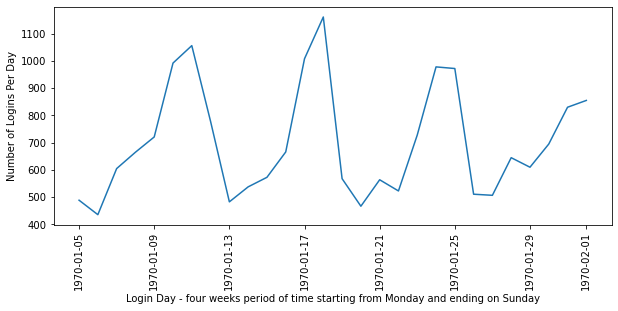

In [162]:
# Taking four weeks period of time starting from a monday and ending on a Sunday.
# We can clearly see that the dip happens on Tuesdays and the peak happens on Sundays.

plt.figure(figsize=(10,4))
plt.plot(byday['num_logins']['1970-01-05':'1970-02-01'])
plt.xticks(rotation=90)
plt.xlabel('Login Day - four weeks period of time starting from Monday and ending on Sunday')
plt.ylabel('Number of Logins Per Day')

In [125]:
# Number of logins grouped by login_time

bytime = logins.groupby('login_time').count()
bytime.columns = ['num_logins']
bytime.head()

,num_logins
login_time,
1970-01-01 20:15:00,6
1970-01-01 20:30:00,8
1970-01-01 20:45:00,7
1970-01-01 21:00:00,3
1970-01-01 21:15:00,4


(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

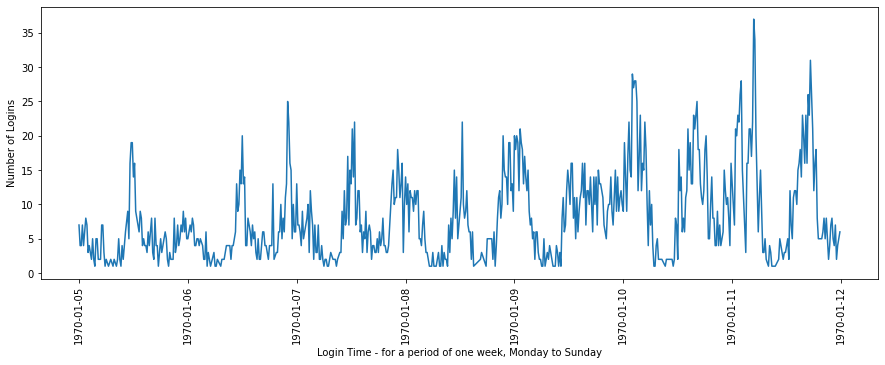

In [163]:
# let's plot one week to see if there is a pattern
plt.figure(figsize=(15,5))
plt.plot(bytime['num_logins']['1970-01-05':'1970-01-11'])
plt.xlabel('Login Time - for a period of one week, Monday to Sunday')
plt.ylabel('Number of Logins')

plt.xticks(rotation=90)

In [ ]:
# The pick hour seems to change a bit depending on the day of the week.
# Monday and Tuesday seem similar and then Wednesday through Friday seem different.

Text(0, 0.5, 'Number of Logins')

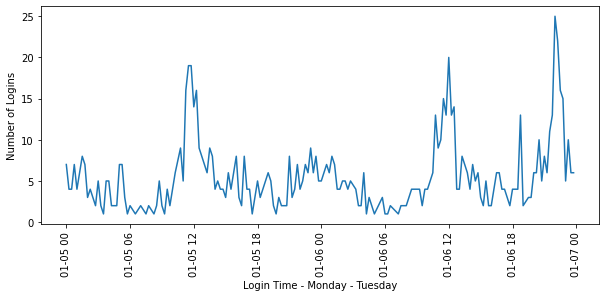

In [165]:
# Let's zoom into on two days, Monday and Tuesday
# The picks are near 12:00 noon

plt.figure(figsize=(10,4))
plt.plot(bytime['num_logins']['1970-01-05':'1970-01-06'])
plt.xticks(rotation=90)
plt.xlabel('Login Time - Monday - Tuesday')
plt.ylabel('Number of Logins')

Text(0, 0.5, 'Number of Logins')

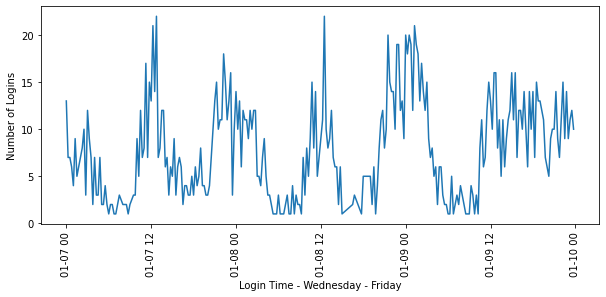

In [166]:
# Let's see Wednesday through Friday
# The picks are near midnight and noon

plt.figure(figsize=(10,4))
plt.plot(bytime['num_logins']['1970-01-07':'1970-01-09'])
plt.xticks(rotation=90)
plt.xlabel('Login Time - Wednesday - Friday')
plt.ylabel('Number of Logins')

Text(0, 0.5, 'Number of Logins')

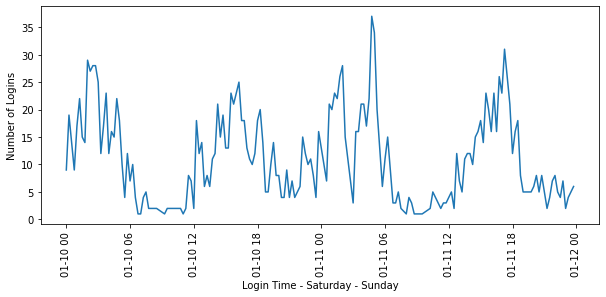

In [167]:
# Let's now see Saturday and Sunday
# The pick hours shift a bit in the weekends.
# The picks seem to happen between midnight and 6:00 a.m. and near 4:00 p.m.

plt.figure(figsize=(10,4))
plt.plot(bytime['num_logins']['1970-01-10':'1970-01-11'])
plt.xticks(rotation=90)
plt.xlabel('Login Time - Saturday - Sunday')
plt.ylabel('Number of Logins')

In [ ]:
# To conclude, picks seem to happen between midnight and 6:00 a.m. 
# During the day, there is usually a pick around noon (which seems to shift to near 4:00 p.m. in the weekends).